In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. Unpack lat-lngs zip object into a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
        print(coordinate[0], coordinate[1])

-68.27510059531691 -20.062455651917105
-33.48778765276631 -141.81280730110768
34.33252255266002 -35.673574551312925
40.126952838482225 -91.79703838480224
-49.50816270942351 -109.19754200352804
-62.11716878537638 -54.45809189304039
26.63299101622208 127.84859092948909
-10.710616386186786 -12.610300398836074
-19.44209977732443 -54.891720297163644
17.33574332932791 1.845948360558907
-49.038555312500975 41.947821203361144
-82.93165461170167 83.81285107848151
48.826204558016 36.37872776291388
-53.83647098460655 -86.20963344893205
72.57111110321952 -30.706242661880793
-18.447304562350183 136.85273555086496
-85.44975967007325 136.04113081003726
22.44244253692672 45.1147635051116
-24.288933012909695 -104.50509975105807
-19.193131404970543 66.78235381266157
-38.90207986658355 -8.824488153540159
51.98551512733428 -109.66414902616754
-39.89430581952003 92.45178872501151
35.515512711829146 172.2446976633202
38.867296800057886 -161.3398101676481
56.91601916140971 -140.9002349946541
-63.164771597106

3.402682364997645 35.956439463699525
7.304430020071393 -108.45743148313107
-20.624680316960394 33.52190262321267
65.33570811841011 154.95282899543923
26.59853603437294 148.02613730481676
85.20538845177524 -133.95400587720292
-37.8943201852289 -13.924376834345935
51.949099456832585 -136.9219042385973
-41.2415529499062 69.83653580909242
84.22296938851457 82.56984366637641
-24.99262793633966 64.6563130646663
-68.74936195678865 119.69404047436461
70.53010232331721 16.360657132877606
-24.933904371174094 147.68814629260356
-17.295125655370242 -57.11646921502559
39.60405760564623 -111.54346420781164
13.44072040587065 60.534504139571766
-16.14529546568224 107.302663668489
63.30520291540597 -76.34220007133123
-2.3706695572048346 -89.31615858376227
-82.14076950244103 22.92139109408663
-52.08161972202218 125.6940981101086
38.01850622483164 71.21726174360609
73.64668589094055 4.785966401630418
-38.310333749422696 26.86468571701255
-63.80275664380249 29.74304237948033
-71.62519707968139 -31.0154018

In [5]:
pip install citipy

In [6]:
# Create a list for holding the cities.
from citipy import citipy

In [7]:
import requests
requests.__version__

'2.28.0'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create a list for holding the cities.
cities = []


# Identify nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | quincy
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | nago
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | rio verde de mato grosso
Processing Record 10 of Set 1 | kidal
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | lozova
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | riyadh
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 21 of Set 1 | james

Processing Record 184 of Set 1 | saleaula
City not found. Skipping...
Processing Record 185 of Set 1 | kisanga
Processing Record 186 of Set 1 | saldanha
Processing Record 187 of Set 1 | jawhar
Processing Record 188 of Set 1 | tasiilaq
Processing Record 189 of Set 1 | kangasala
Processing Record 190 of Set 1 | vestmanna
Processing Record 191 of Set 1 | ouallam
Processing Record 192 of Set 1 | kure
Processing Record 193 of Set 1 | ascension
Processing Record 194 of Set 1 | svetlogorsk
Processing Record 195 of Set 1 | santa marta
Processing Record 196 of Set 1 | torbay
Processing Record 197 of Set 1 | taoudenni
Processing Record 198 of Set 1 | atar
Processing Record 199 of Set 1 | kitimat
Processing Record 200 of Set 1 | zarate
Processing Record 201 of Set 1 | talaya
Processing Record 202 of Set 1 | thompson
Processing Record 203 of Set 1 | kuusamo
Processing Record 204 of Set 1 | vestmannaeyjar
Processing Record 205 of Set 1 | snezhnogorsk
Processing Record 206 of Set 1 | yumen
Processin

Processing Record 371 of Set 1 | san pedro de macoris
Processing Record 372 of Set 1 | nouakchott
Processing Record 373 of Set 1 | port townsend
Processing Record 374 of Set 1 | miles city
Processing Record 375 of Set 1 | malanje
Processing Record 376 of Set 1 | mahanje
Processing Record 377 of Set 1 | nouadhibou
Processing Record 378 of Set 1 | high prairie
Processing Record 379 of Set 1 | atagay
Processing Record 380 of Set 1 | mandalgovi
Processing Record 381 of Set 1 | eyl
Processing Record 382 of Set 1 | labuhan
Processing Record 383 of Set 1 | los palacios
Processing Record 384 of Set 1 | shirokiy
Processing Record 385 of Set 1 | marienburg
Processing Record 386 of Set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record 387 of Set 1 | santa cruz
Processing Record 388 of Set 1 | port elizabeth
Processing Record 389 of Set 1 | broome
Processing Record 390 of Set 1 | lillooet
Processing Record 391 of Set 1 | seydi
Processing Record 392 of Set 1 | allonnes
Processi

Processing Record 557 of Set 1 | katangli
Processing Record 558 of Set 1 | jiangyou
Processing Record 559 of Set 1 | eydhafushi
Processing Record 560 of Set 1 | grand gaube
Processing Record 561 of Set 1 | faya
Processing Record 562 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 563 of Set 1 | huarmey
Processing Record 564 of Set 1 | samusu
City not found. Skipping...
Processing Record 565 of Set 1 | port moresby
Processing Record 566 of Set 1 | serov
Processing Record 567 of Set 1 | daru
Processing Record 568 of Set 1 | ngunguru
Processing Record 569 of Set 1 | tabat
Processing Record 570 of Set 1 | cockburn town
Processing Record 571 of Set 1 | bagula
Processing Record 572 of Set 1 | saryagash
Processing Record 573 of Set 1 | contai
Processing Record 574 of Set 1 | waddan
Processing Record 575 of Set 1 | abu kamal
Processing Record 576 of Set 1 | camopi
Processing Record 577 of Set 1 | klaksvik
Processing Record 578 of Set 1 | honningsvag
Processing Record 579 of S

In [13]:
len(city_data)

577

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,286.00,90,85,3.60,UY,2022-08-31 21:45:03
1,Rikitea,-23.1203,-134.9692,296.01,77,1,1.81,PF,2022-08-31 21:45:05
2,Ribeira Grande,38.5167,-28.7000,295.89,81,82,3.54,PT,2022-08-31 21:45:06
3,Quincy,42.2529,-71.0023,301.53,44,40,8.75,US,2022-08-31 21:45:07
4,Castro,-24.7911,-50.0119,285.07,82,12,2.76,BR,2022-08-31 21:45:08
5,Ushuaia,-54.8000,-68.3000,280.96,66,75,3.09,AR,2022-08-31 21:45:09
6,Nago,26.5881,127.9761,302.39,83,85,8.33,JP,2022-08-31 21:40:17
7,Georgetown,5.4112,100.3354,300.90,94,20,1.54,MY,2022-08-31 21:44:10
8,Rio Verde De Mato Grosso,-18.9181,-54.8442,303.10,24,14,2.45,BR,2022-08-31 21:44:39
9,Kidal,18.4411,1.4078,305.53,35,49,4.36,ML,2022-08-31 21:45:12


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-08-31 21:45:03,-33.6971,-53.4616,286.00,90,85,3.60
1,Rikitea,PF,2022-08-31 21:45:05,-23.1203,-134.9692,296.01,77,1,1.81
2,Ribeira Grande,PT,2022-08-31 21:45:06,38.5167,-28.7000,295.89,81,82,3.54
3,Quincy,US,2022-08-31 21:45:07,42.2529,-71.0023,301.53,44,40,8.75
4,Castro,BR,2022-08-31 21:45:08,-24.7911,-50.0119,285.07,82,12,2.76
5,Ushuaia,AR,2022-08-31 21:45:09,-54.8000,-68.3000,280.96,66,75,3.09
6,Nago,JP,2022-08-31 21:40:17,26.5881,127.9761,302.39,83,85,8.33
7,Georgetown,MY,2022-08-31 21:44:10,5.4112,100.3354,300.90,94,20,1.54
8,Rio Verde De Mato Grosso,BR,2022-08-31 21:44:39,-18.9181,-54.8442,303.10,24,14,2.45
9,Kidal,ML,2022-08-31 21:45:12,18.4411,1.4078,305.53,35,49,4.36


In [16]:
from pathlib import Path
# Create the output file (CSV).
output_data_file = Path('World_Weather_Analysis/cities.csv')
output_data_file.parent.mkdir(parents=True, exist_ok=True)
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

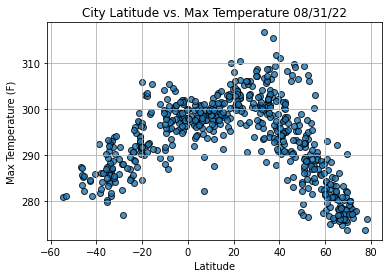

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

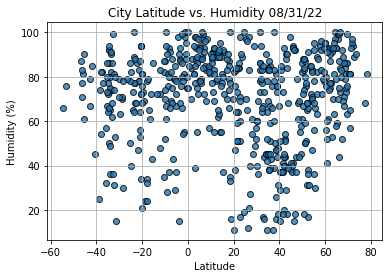

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig2.png")
# Show plot.
plt.show()

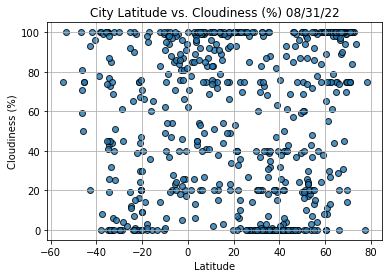

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig3.png")
# Show plot.
plt.show()

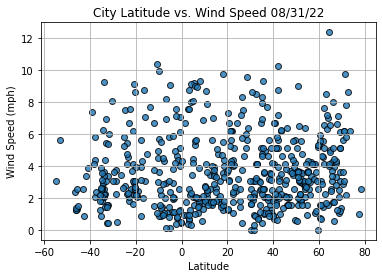

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ribeira Grande,PT,2022-08-31 21:45:06,38.5167,-28.7000,295.89,81,82,3.54
3,Quincy,US,2022-08-31 21:45:07,42.2529,-71.0023,301.53,44,40,8.75
6,Nago,JP,2022-08-31 21:40:17,26.5881,127.9761,302.39,83,85,8.33
7,Georgetown,MY,2022-08-31 21:44:10,5.4112,100.3354,300.90,94,20,1.54
9,Kidal,ML,2022-08-31 21:45:12,18.4411,1.4078,305.53,35,49,4.36


In [24]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2022-08-31 21:45:15
Lat                        -53.15
Lng                      -70.9167
Max Temp                   281.21
Humidity                       76
Cloudiness                    100
Wind Speed                   5.66
Name: 13, dtype: object

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

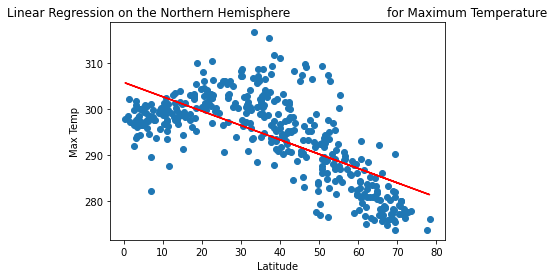

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

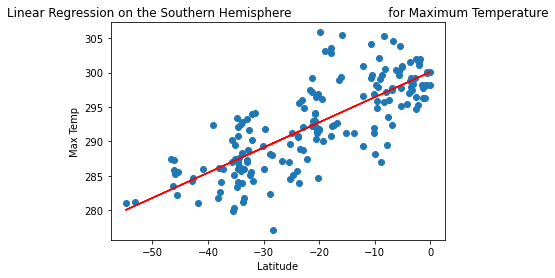

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

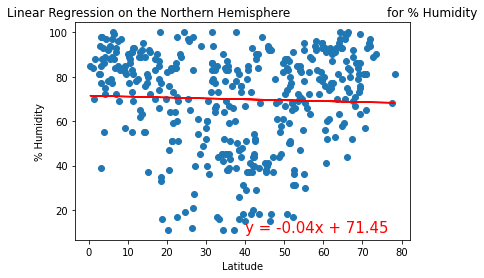

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

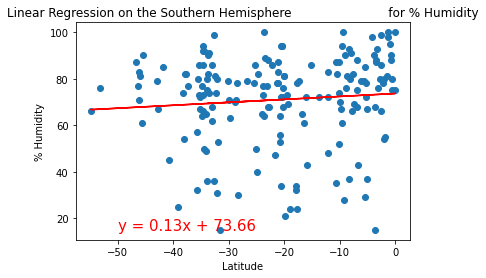

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

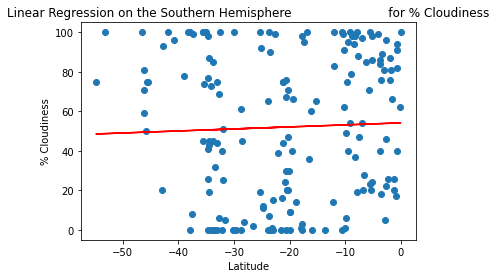

In [30]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

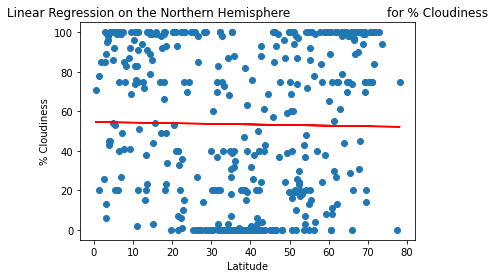

In [31]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

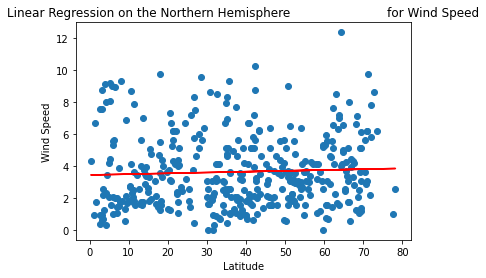

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

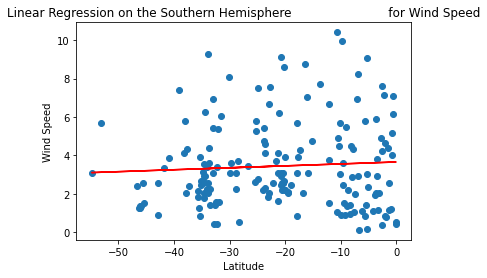

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [43]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [44]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [45]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [46]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))